In [1]:
spiking_cutoff_shift = 50
bursting_cutoff_shift = 50

from act.data_processing import *
import numpy as np
import matplotlib.pyplot as plt
from act.cell_model import ACTCellModel
from act.simulator import ACTSimulator
from act.segregation import ACTSegregator
from act.act_types import SimulationParameters, ConstantCurrentInjection

sim_folder = f"./seg_{spiking_cutoff_shift}_{bursting_cutoff_shift}_LAA"

sim_cell = ACTCellModel(
    path_to_hoc_file="/home/ubuntu/ACT/data/LAA/seg_cutoff_test/template.hoc",
    path_to_mod_files="/home/ubuntu/ACT/data/LAA/seg_cutoff_test/modfiles",
    cell_name="Cell_A_seg",
    passive=[],
    active_channels=["gbar_nap",
                    "gmbar_im", 
                    "gbar_na3",
                    "gkdrbar_kdr", 
                    "gcabar_cadyn", 
                    "gsAHPbar_sAHP", 
                    "gkabar_kap",
                    "ghdbar_hd",
                    "glbar_leak"]
)

# Set simulations
simulator = ACTSimulator(output_folder_name = "output")



CI=[ConstantCurrentInjection(amp=0.040,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.045,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.050,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.055,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.060,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.0,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.1,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.2,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.3,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.4,dur=800,delay=100),
    ConstantCurrentInjection(amp=4.5,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=5.0,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=5.5,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=6.0,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=6.5,dur=800,delay=100, lto_hto=1)]


#CI=[ConstantCurrentInjection(amp=0.040,dur=800,delay=100, lto_hto=1)]

for i in range(len(CI)):
    specific_sim_cell = ACTCellModel(
        cell_name=sim_cell.cell_name,
        path_to_hoc_file=sim_cell.path_to_hoc_file,
        path_to_mod_files=sim_cell.path_to_mod_files,
        passive=sim_cell.passive,
        active_channels=sim_cell.active_channels
    )
    
    sim_params = SimulationParameters(
                    sim_name=sim_folder,
                    sim_idx=i,
                    h_v_init=-65.0, 
                    h_tstop=1000,    
                    h_dt=0.1,      
                    h_celsius=6.3,   
                    CI=[CI[i]]
                )
    
    simulator.submit_job(specific_sim_cell, sim_params)
    
simulator.run_jobs(len(CI))

combine_data("output/" + sim_folder)

--No graphics will be displayed.



        ACTSimulator (2025)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
output/./seg_50_50_LAA


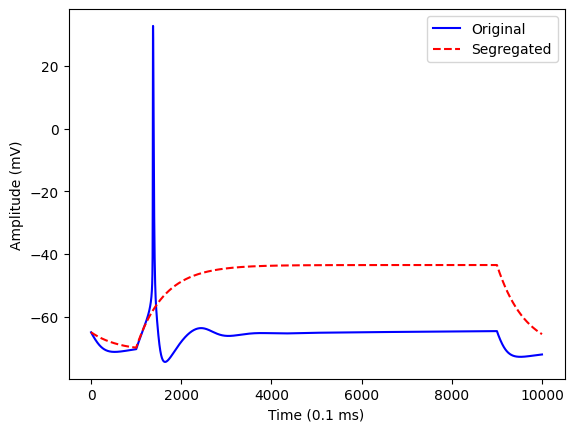

In [2]:
import numpy as np
import matplotlib.pyplot as plt

orig_out = np.load(f"./output/original_LAA/out_6.npy")
seg_out = np.load(f"./output/seg_{spiking_cutoff_shift}_{bursting_cutoff_shift}_LAA/out_6.npy")

plt.plot(orig_out[:, 0], label = "Original", c = 'blue')
plt.plot(seg_out[:, 0], label = "Segregated", ls = '--', c = 'red')
plt.ylabel("Amplitude (mV)")
plt.xlabel("Time (0.1 ms)")
plt.legend()